In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset

df = pd.read_csv("Amazon_Products.csv")

C:\Users\amodj\AppData\Local\Temp\ipykernel_7348\473501933.py:3: DtypeWarning: Columns (5,6,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,26

In [3]:
# Checking First few rows

df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Columns: 895 entries, uniq_id to Unnamed: 894
dtypes: object(895)
memory usage: 68.3+ MB


In [5]:
# Checking columns names

df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       ...
       'Unnamed: 885', 'Unnamed: 886', 'Unnamed: 887', 'Unnamed: 888',
       'Unnamed: 889', 'Unnamed: 890', 'Unnamed: 891', 'Unnamed: 892',
       'Unnamed: 893', 'Unnamed: 894'],
      dtype='object', length=895)

# Data Cleaning

In [6]:
# Dropping rows that have all null values

df.dropna(how="all", inplace = True)

In [7]:
# Resetting index

df.reset_index(inplace=True,drop = True)

In [8]:
# Dropping duplicate rows and columns

df.drop_duplicates(inplace = True)
df.drop("product_description",inplace = True , axis = 1)

In [9]:
# Merging Unnamed columns

cols_to_merge = df.columns[13:896]
df["others"] = df[cols_to_merge].apply(lambda row: ', '.join(map(str, row.dropna())) if any(row.notnull()) else None,axis = 1)
df.drop(columns = cols_to_merge , inplace = True)
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,others
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,None
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,None
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,None
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,NaN,NaN,None
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,None


In [10]:
# Convert to objects to float

def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

In [11]:
# Changing the Datatype of price and cleaning

for i in range(len(df)):
    try:
        df["price"].iloc[i] = df["price"].iloc[i].replace("£","")
    except:
        continue
df["price"] = df["price"].apply(convert_to_float)      

In [12]:
# Changing Datatype from Object to Float

df["number_available_in_stock"] = df["number_available_in_stock"].str.replace(r'\D+', '', regex=True)
df["number_available_in_stock"] = df["number_available_in_stock"].apply(convert_to_float)

df["number_of_reviews"] = df["number_of_reviews"].apply(convert_to_float)

df['average_review_rating'] = df['average_review_rating'].str.extract(r'(\d+\.\d+)')
df["average_review_rating"] = df["average_review_rating"].apply(convert_to_float)

df["number_of_answered_questions"] = df["number_of_answered_questions"].apply(convert_to_float)

In [13]:
# Adding Category and Sub_Category Column to DataFrame

Category = df["amazon_category_and_sub_category"].str.split(' > ').str[0]
Sub_Category = df["amazon_category_and_sub_category"].str.split('>').str[1]
df.drop("amazon_category_and_sub_category", inplace = True , axis = 1)
df.insert(7,"Category",Category)
df.insert(8,"Sub_Category" , Sub_Category)

In [14]:
# Adding rating_score to DataFrame

def rating(score):
    if score < 2.0 : return 'Very Bad'
    elif score < 3.0 : return 'Bad'
    elif score < 4.0 : return 'Good'
    elif score < 5.0 : return 'Very Good'
    elif score == 5.0 : return 'Excellent'

rating_score = df["average_review_rating"].apply(rating)
df.insert(10,"rating_score",rating_score)

# Exploratory Data Analysis

In [15]:
# Setting Style and Pallete

sns.set_style(style='whitegrid')

sns.set_palette(palette="icefire")

## Analysis 1 - Product

#### Main Category and their respective sub categories

In [16]:
main_sub = df[['Category', 'Sub_Category']]

main_sub_piv = pd.pivot_table(main_sub, index=['Category', 'Sub_Category'], aggfunc='count')

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

main_sub_piv

Empty DataFrame
Columns: []
Index: [(Arts & Crafts,  Art & Craft Supplies ), (Arts & Crafts,  Art Sand), (Arts & Crafts,  Blackboards), (Arts & Crafts,  Children's Chalk), (Arts & Crafts,  Children's Craft Kits), (Arts & Crafts,  Children's Craft Kits ), (Arts & Crafts,  Colouring Pencils), (Arts & Crafts,  Colouring Pens & Markers), (Arts & Crafts,  Doll Making), (Arts & Crafts,  Drawing & Painting Supplies ), (Arts & Crafts,  Felt Kits), (Arts & Crafts,  Painting By Numbers), (Arts & Crafts,  Paper & Stickers), (Baby & Toddler Toys,  Activity Centres), (Baby & Toddler Toys,  Learning & Activity Toys), (Baby & Toddler Toys,  Pushchair Toys), (Baby & Toddler Toys,  Rattles), (Baby & Toddler Toys,  Rockers & Ride-ons), (Baby & Toddler Toys,  Rocking Horses), (Baby & Toddler Toys,  Sorting, Stacking & Plugging Toys), (Baby & Toddler Toys,  Sound Toys), (Baby & Toddler Toys,  Spinning Tops), (Baby & Toddler Toys,  Teaching Clocks), (Bags,  Schoolbags & Backpacks ), (Bedding & Linens,  Children's Bedding ), (Camping & Hiking,  Sleeping Gear ), (Car Parts,  Instruments ), (Characters & Brands,  Action Man), (Characters & Brands,  Action Man ), (Characters & Brands,  BRIO ), (Characters & Brands,  Barbie), (Characters & Brands,  Barbie ), (Characters & Brands,  Bob the Builder ), (Characters & Brands,  Crayola), (Characters & Brands,  Disney ), (Characters & Brands,  Early Learning Centre), (Characters & Brands,  Harry Potter ), (Characters & Brands,  Hasbro), (Characters & Brands,  Hornby), (Characters & Brands,  LeapFrog), (Characters & Brands,  LeapFrog ), (Characters & Brands,  Marvin's Magic), (Characters & Brands,  Ravensburger), (Characters & Brands,  Ravensburger ), (Characters & Brands,  Star Wars ), (Characters & Brands,  Thomas & Friends ), (Characters & Brands,  Thunderbirds ), (Characters & Brands,  Tomy), (Characters & Brands,  Toy Story ), (Characters & Brands,  Upstarts ), (Characters & Brands,  VTech), (Characters & Brands,  WWE), (Characters & Brands,  Winnie-the-Pooh ), (Cooking & Dining,  Kitchen Tools & Gadgets ), (Die-Cast & Toy Vehicles,  Toy Trains & Accessories ), (Die-Cast & Toy Vehicles,  Toy Vehicle Playsets), (Die-Cast & Toy Vehicles,  Toy Vehicles & Accessories ), (Dogs,  Clothing & Accessories ), (Dolls & Accessories,  Dolls' House Dolls & Accessories ), (Dolls & Accessories,  Fashion Dolls & Accessories), (Dolls & Accessories,  Fashion Dolls & Accessories ), (Dolls & Accessories,  Playsets), (Dolls & Accessories,  Soft Dolls), (Educational Toys,  Literacy & Spelling), (Educational Toys,  Mathematics), (Electronic Toys,  Digital Cameras), (Electronic Toys,  Educational Computers & Accessories), (Electronic Toys,  Kids Remote & App Controlled Toys), (Electronic Toys,  Robots), (Fancy Dress,  Accessories), (Fancy Dress,  Accessories ), (Fancy Dress,  Costumes), (Fancy Dress,  Costumes ), (Figures & Playsets,  Accessories), (Figures & Playsets,  Cowboys & Indians), (Figures & Playsets,  Dinosaurs), (Figures & Playsets,  Emergency Services), (Figures & Playsets,  Farm & Animals), (Figures & Playsets,  Knights & Castles), (Figures & Playsets,  Military), (Figures & Playsets,  Pirates), (Figures & Playsets,  Science Fiction & Fantasy), (Figures & Playsets,  Sport), (Figures & Playsets,  Transportation & Traffic), (Games,  Board Games), (Games,  Card Games), (Games,  Casino Equipment ), (Games,  Chess), (Games,  DVD Games), (Games,  Dice & Dice Games), (Games,  Dominoes & Tile Games), (Games,  Drinking Games), (Games,  Educational Games), (Games,  Mystery Games), (Games,  Strategy Games), (Games,  Tabletop & Miniature Gaming), (Games,  Travel & Pocket Games), (Games,  Trivia & Quiz Games), (Gardening,  Greenhouses & Plant Germination Equipment ), (Gardening,  Hand Tools ), ...]

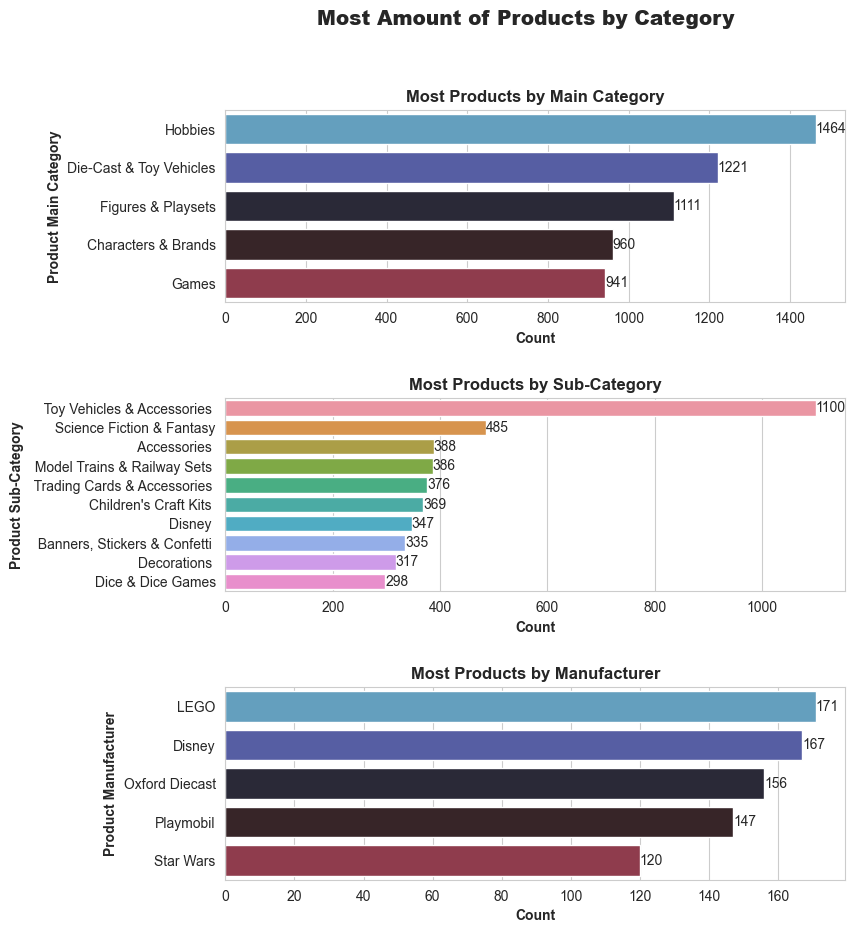

In [17]:
#Most amount of products by category

most_main_items = df['Category'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')

most_sub_items = df['Sub_Category'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

most_manufacturer_item = df["manufacturer"].value_counts().head(5).rename_axis('manufacturer').reset_index(name = 'counts')

fig, ax = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')
sns.barplot(ax=ax[2], data=most_manufacturer_item, x='counts', y='manufacturer')


plt.subplots_adjust(hspace = 0.5)

ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[2].set_xlabel('Count', fontweight='bold')
ax[2].set_ylabel('Product Manufacturer', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')
ax[2].set_title('Most Products by Manufacturer', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[2].bar_label(ax[2].containers[0])

plt.show()

### Games And Hobby related products are mostly present in this Category

### Vehicle type toys are mostly present

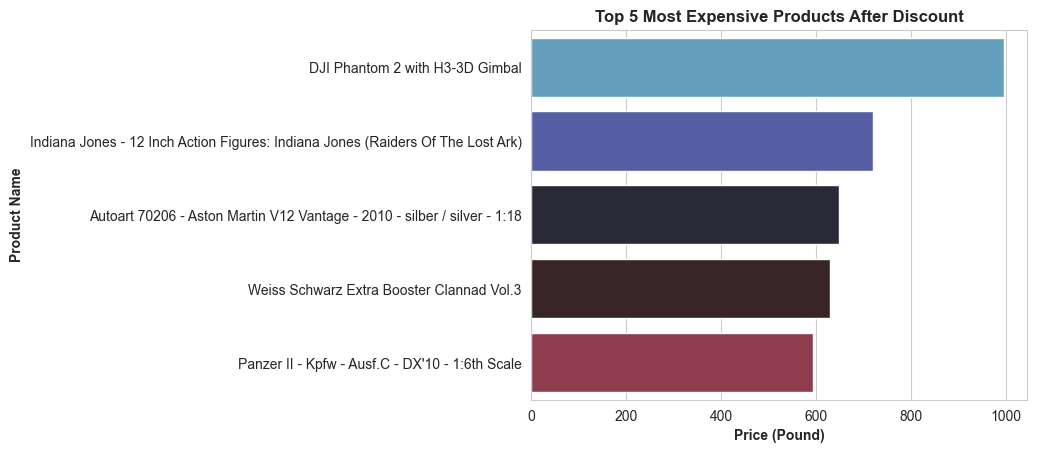

In [18]:
#Top 5 Most Expensive Products 
disc_exp = sns.barplot(data=df.sort_values('price', ascending=False).head(5), x='price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Price (Pound)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

#### Most Expensive product is an electronic gadget retailing for almost £1000

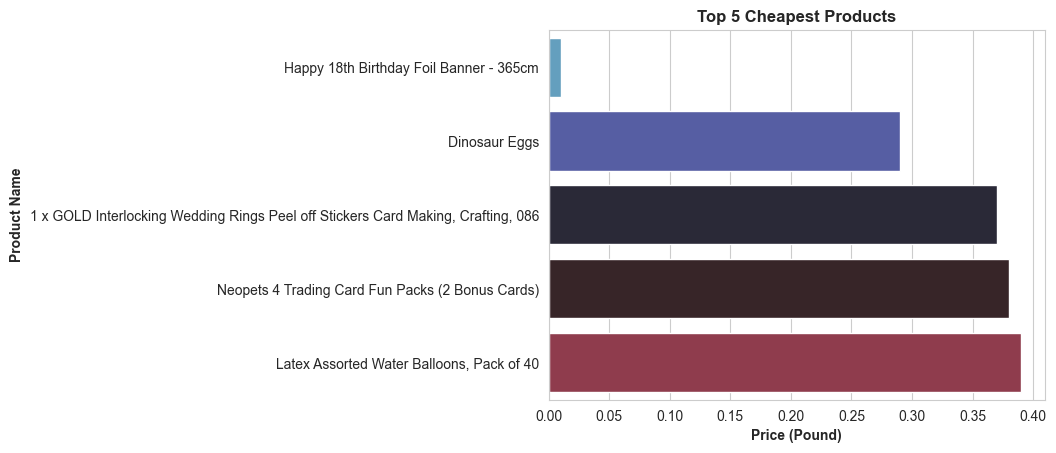

In [19]:
#Top 5 Cheapest Products
disc_cheap = sns.barplot(data=df.sort_values('price').head(5), x='price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products', fontweight='bold')
disc_cheap.set_xlabel('Price (Pound)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

#### Cheapest products are mostly decorative items

## Analysis 2 - Rating

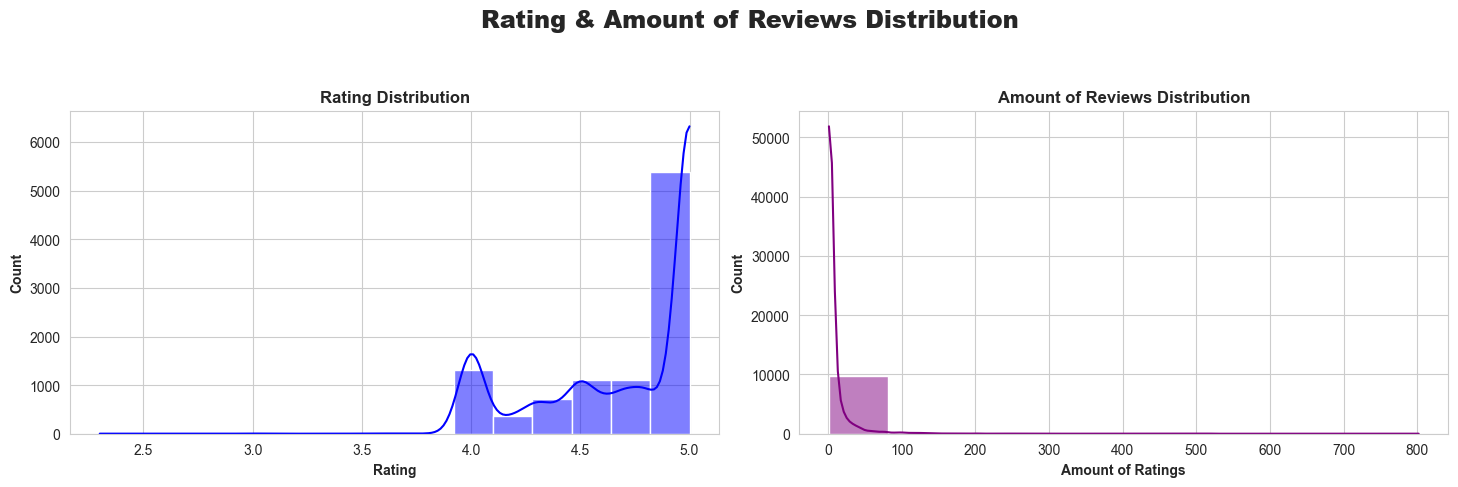

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Reviews Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df, x='average_review_rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df, x='number_of_reviews', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Reviews Distribution', fontweight='bold')

plt.show()

#### Rating Distribution is highly left skewed , more than half of the products have 5.0 rating

#### Not much reviews have been given to products , most of them lying between 0 - 10

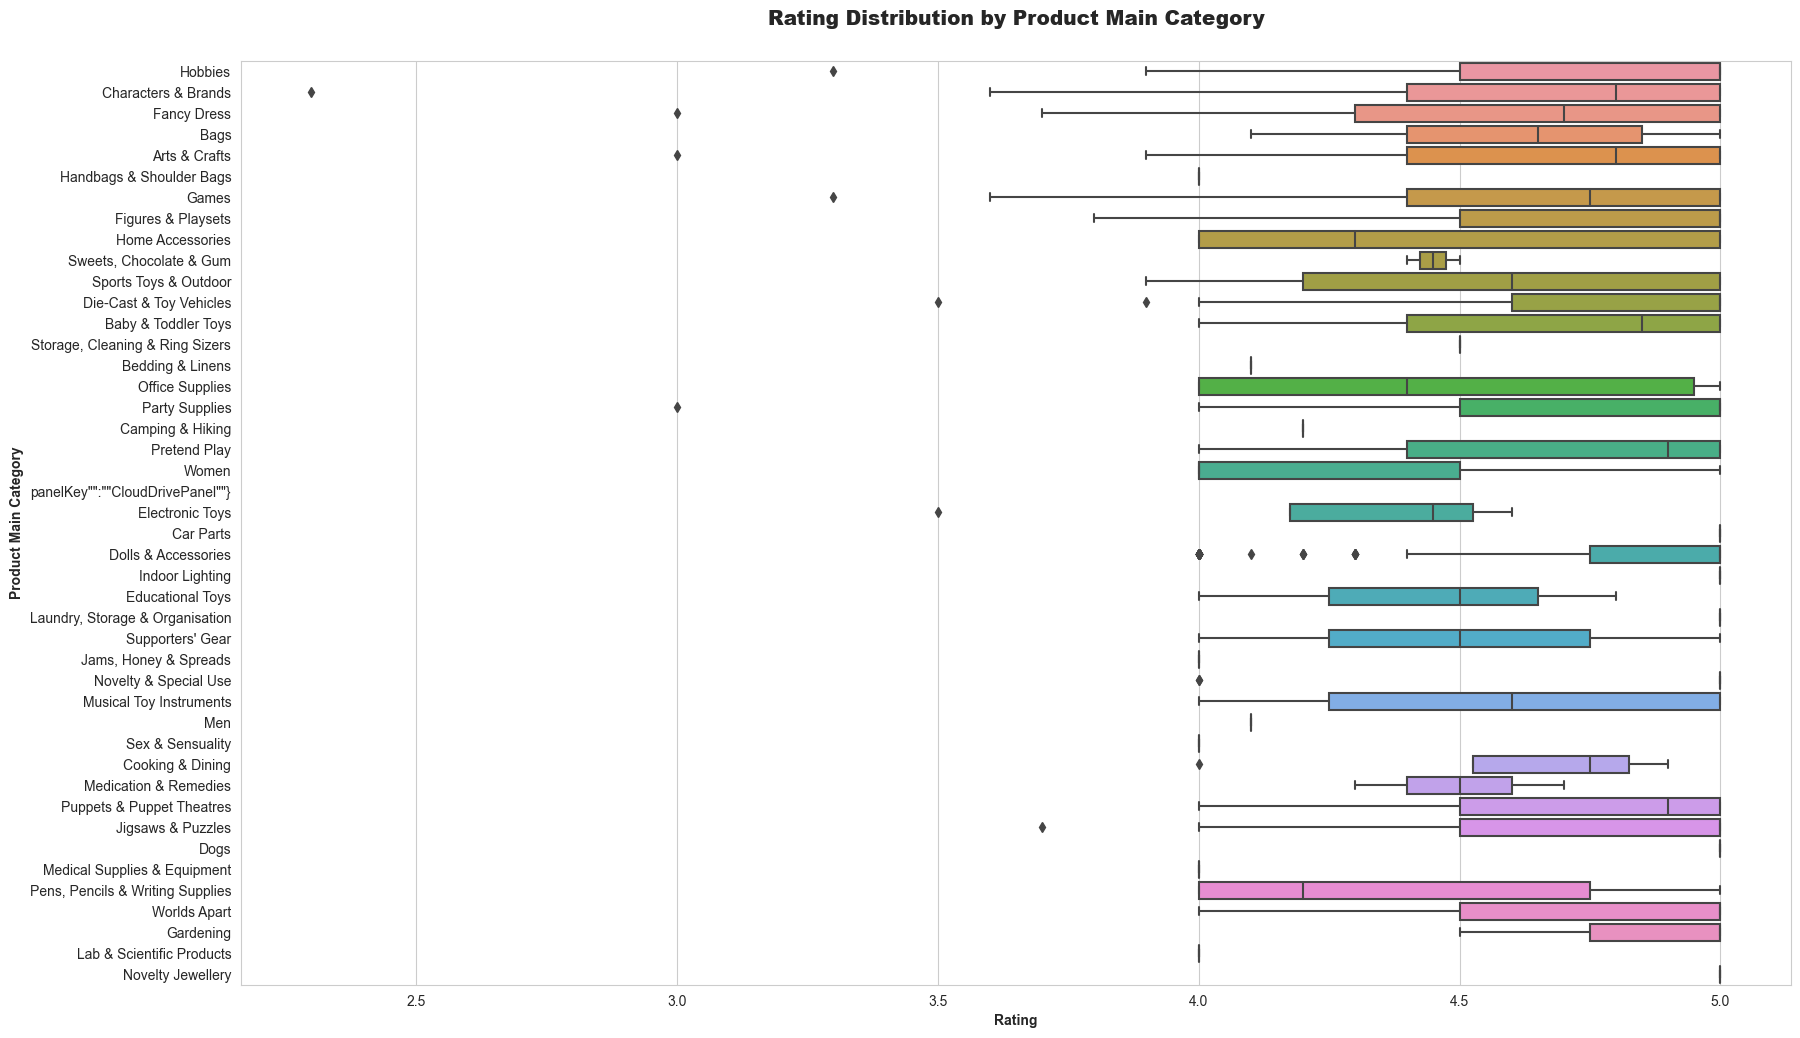

In [21]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(20, 12))

sns.boxplot(ax=ax, data=df, x='average_review_rating', y='Category')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

#### Lowest rating is 2.25 belonging to Hobbies categories

In [22]:
#Rating of Products based on Rating Category

rate_main_cat = df.groupby(['Category','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat

,Category,Rating Category,Amount
0,Arts & Crafts,Excellent,379
1,Arts & Crafts,Good,2
2,Arts & Crafts,Very Good,421
3,Baby & Toddler Toys,Excellent,51
4,Baby & Toddler Toys,Very Good,55
5,Bags,Excellent,1
6,Bags,Very Good,3
7,Bedding & Linens,Very Good,1
8,Camping & Hiking,Very Good,1
9,Car Parts,Excellent,1


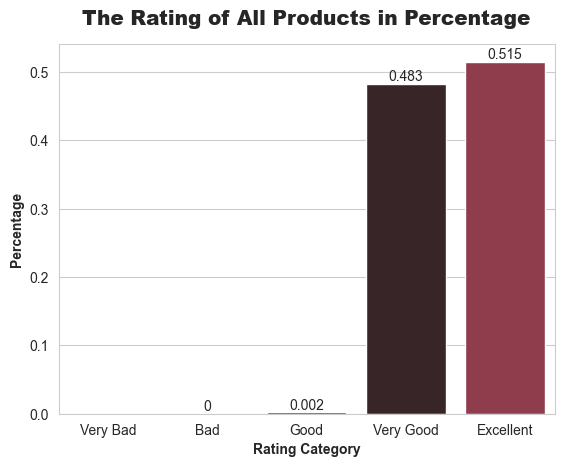

In [23]:
#The Rating of All Products in Percentage

rating_ordered = ['Very Bad', 'Bad', 'Good', 'Very Good' , 'Excellent']

rating_count = df['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

#### Most of the customers are satisfied by their products